**План занятия**
1. Логистическая регрессия
2. Основы EDA
3. Практика

# Задача классификации

Бинарная классификация

Данные разделены на два класса, необходимо обучить модель определять принадлежность произвольного объекта (из рассматриваемого множества) к одному из них. На выходе алгоритм должен выдавать либо метку одного из двух классов, либо вероятности принадлежности рассматриваемого объекта к каждому из них.

Многоклассовая классификация

Постановка задачи аналогична задаче бинарной классификации, при условии, что количество классов больше двух. Решается задача, как правило, с помощью всё тех же бинарных классификаторов, но используются различные подходы при их обучении и агрегации прогнозов.

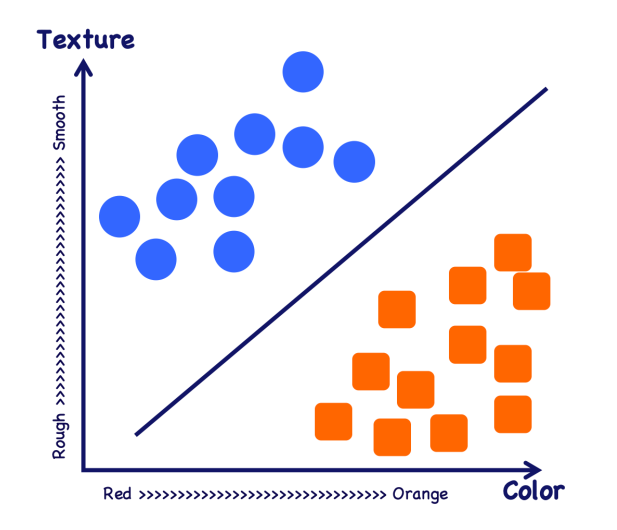

Логистическая регрессия является одним из статистических методов классификации. Также она входит в топ наиболее часто используемых алгоритмов в науке о данных.   
В методе логистической регрессии значением функции является вероятность того, что данное исходное значение принадлежит к определенному классу.

Основная идея логистической регрессии заключается в том, что пространство исходных значений может быть разделено линейной границей (т.е. прямой) на две соответствующих классам области.


Логистическая функция
 $\sigma(z) = \frac{1}{1 + \exp^{-z}}$
Ищем решение в виде  
$f(x,b)=b_0+b_1 x_1+b_2 x_2+...+b_k x_k$  
$y = \sigma(f(x, b))$   
   
Почитать подробнее: https://habr.com/ru/companies/io/articles/265007/

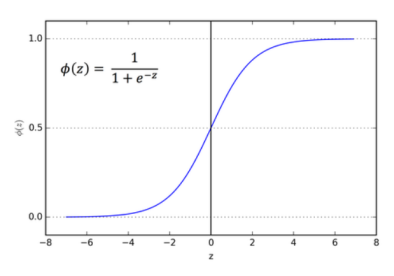

# Метрики

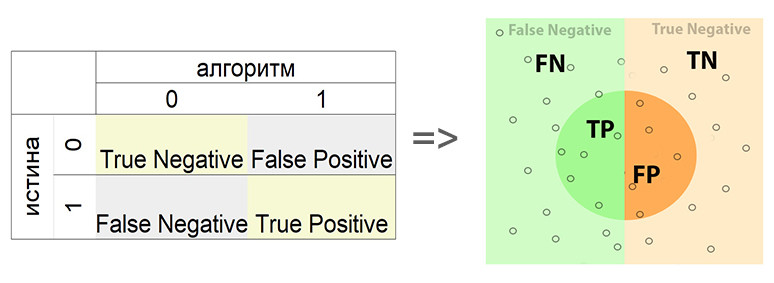


**ROC-кривая + ROC-AUC**   
(ROC = receiver operating characteristic, иногда говорят «кривая ошибок»), а качество оценивают как площадь под этой кривой – AUC (AUC = area under the curve)

Графичекая характеристика качества бинарного классификатора   
Отображает зависимость доли верно-положительных классификаций *True Positive Rate (TPR)* от доли ложно-положительных классификаций *False Positive Rate (FPR)*.   


                    
  *Наглядно*: модель предсказала, кто из пациентов болен.  

TPR  = (сколько больных людей модель назвала больными)/(сколько больных людей на самом деле)  
FPR = (сколько здоровых людей модель назвала больными)/(сколько здоровых людей на самом деле)  

Почитать подробнее : https://habr.com/ru/companies/otus/articles/809147/

<center>$\large TPR = \LARGE \frac{TP}{TP \: + \: FN} \:\:\:\:\: \large FPR = \LARGE \frac{FP}{FP \: + \: TN}$<center>

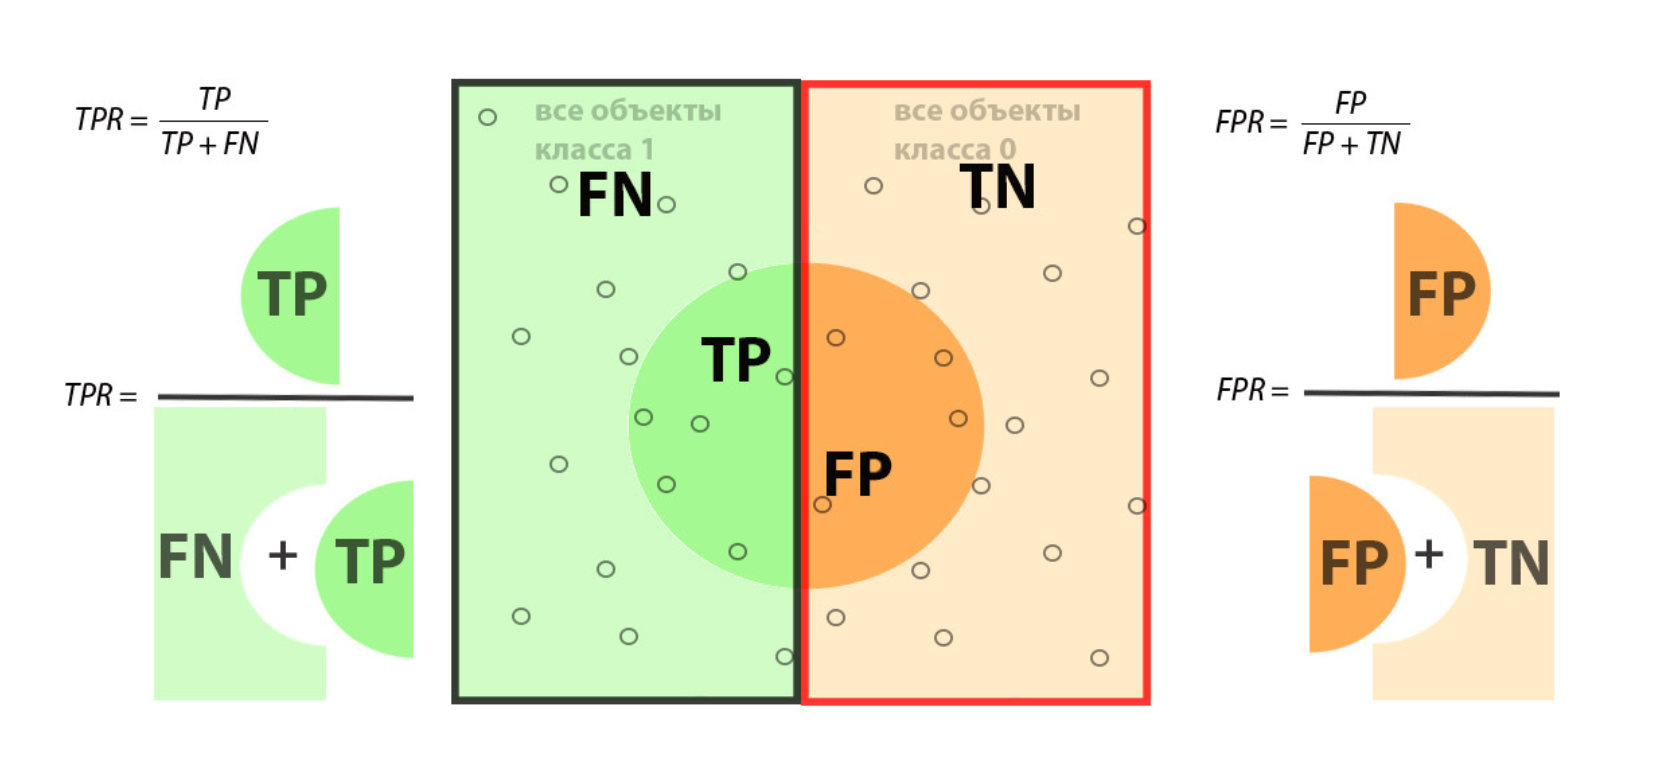
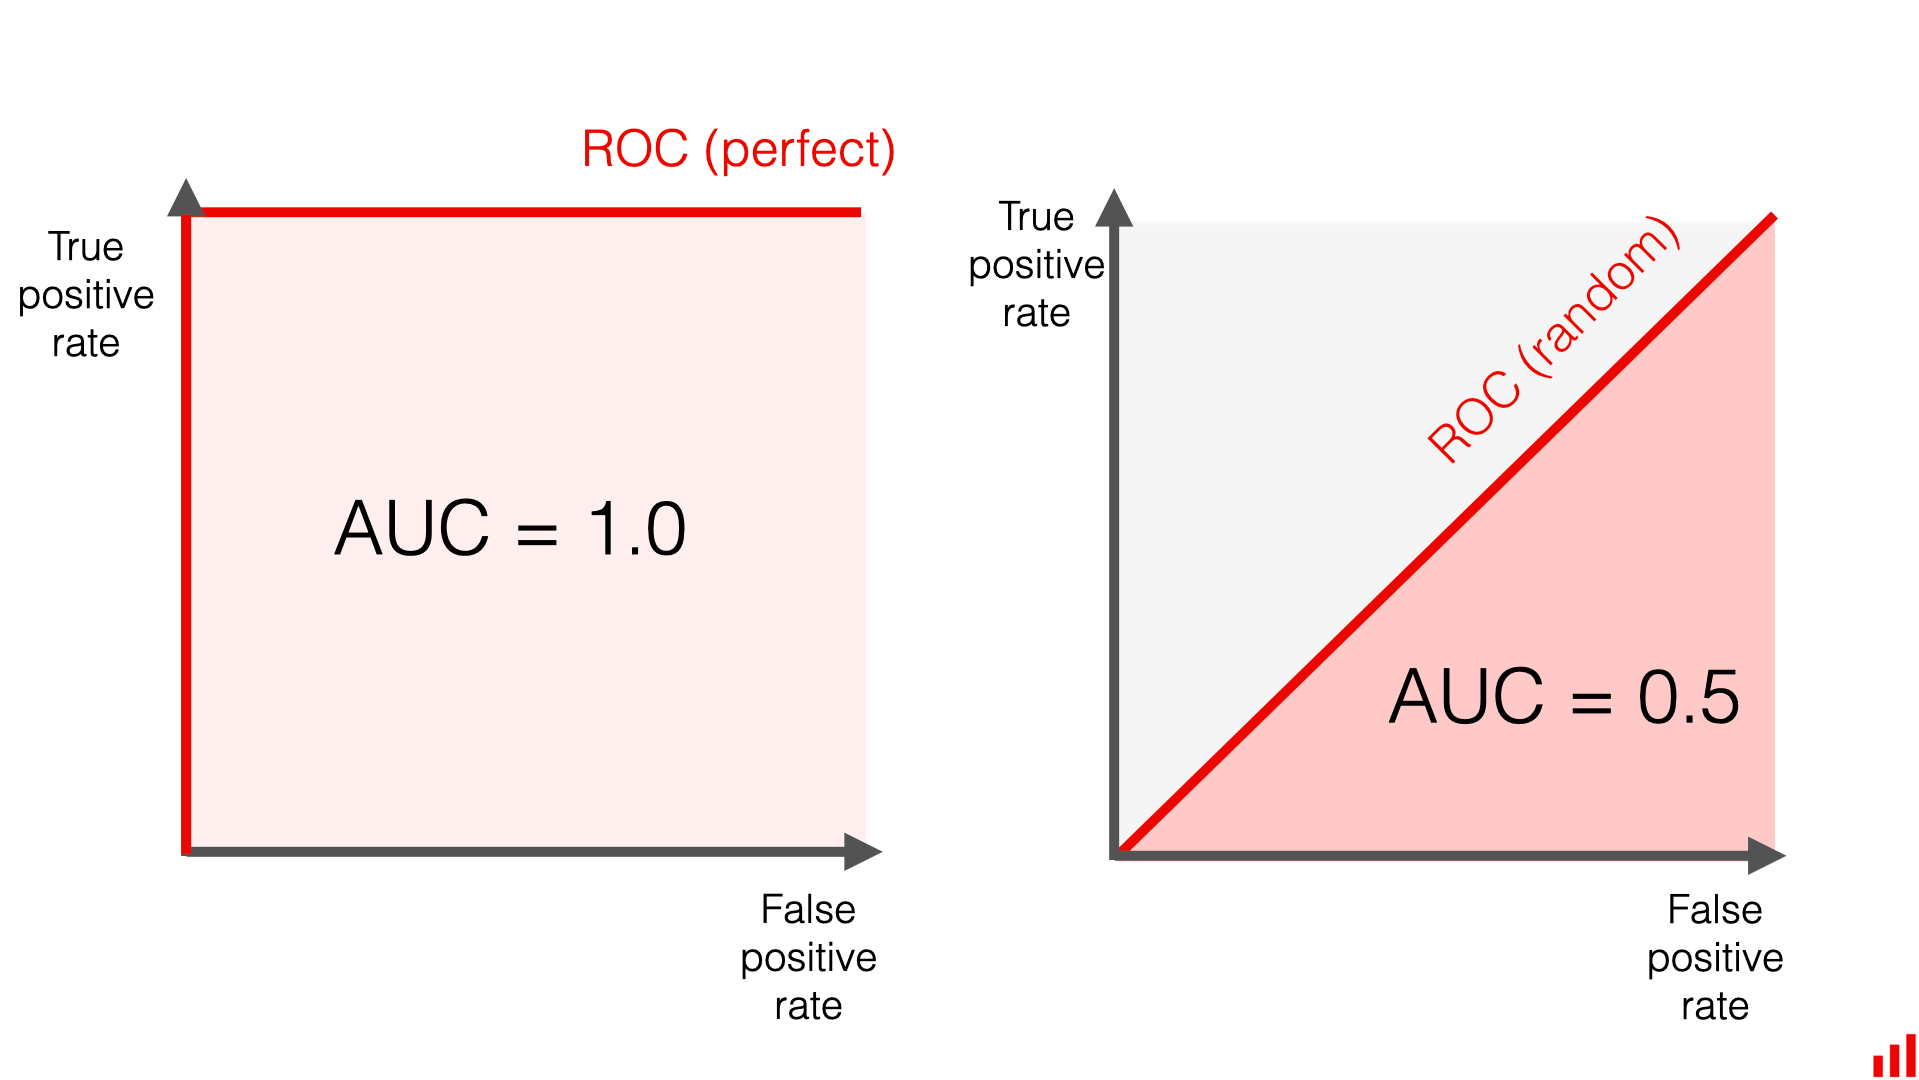
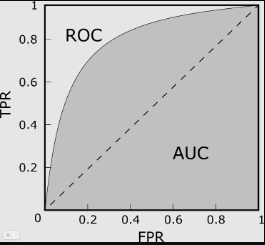

In [41]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report

pd.set_option("future.no_silent_downcasting", True)
pd.set_option('display.max_columns', 30)
import warnings

warnings.filterwarnings("ignore")

# Данные и EDA

**EDA** - Exploratory Data Analysis (Разведочный анализ данных)<a class='anchor' id='eda'>
   
В основе разведочного анализа лежит идея о том, что, прежде чем строить сложные модели или делать окончательные выводы, нужно тщательно изучить данные. Это включает в себя визуализацию, статистический анализ, проверку предположений и много другое.

**Зачем это?**
- Понимание, как устроены данные
- Проверка  признаков на адекватность
- Выявление аномалий и выбросов
- Определение связей и корреляций между переменными
- _Генерация новых фич_ - наибольший вклад в качество прогноза  

Почитать подробнее: https://habr.com/ru/companies/otus/articles/752434/   



In [43]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ШИФТ интенсив/weatherAUS.csv')
# ДС с информацией о погоде, наша задача - предсказать будет ли на следующий день дождь (RainTomorrow)

In [44]:
df
# Evaporation - испарение
# Humidity - влажность

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [45]:
df.info()
# Результаты метода df.info() показывают общую инфу о ДС:

# - Общее количество столбцов и строк в DataFrame.
# - Индекс колонок и их названия.
# - Количество ненулевых значений в каждом столбце.
# - Тип данных каждого столбца (integer, float, string и т.д.).
# - Общее количество использованной памяти.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [46]:
df = df[df['RainTomorrow'].notna()].copy()
# .notna() возвращает данные ДС со значениями T/F в зависимости от значений - NaN/ not NaN
# с помощью него можно фильтровать пропуски

In [48]:
df['RainTomorrow'] = df['RainTomorrow'].replace({'Yes': 1, 'No': 0}).astype(int)
# .replace заменяет значения на указанные
# .astype - приводит к нужному типу

df['RainTomorrow'].value_counts()
# .value_counts() возвращает уникальные значения из dataframe Pandas в отсортированном порядке (по частоте встречаемости)

,count
RainTomorrow,
0,110316
1,31877


In [50]:
# можно в долях
df['RainTomorrow'].value_counts(1)*100

,proportion
RainTomorrow,
0,77.581878
1,22.418122


## Классификация на 2-х признаках

In [52]:
df.head(3)
# .head(n) - выводит n первых строк ДС, по умолчанию n=5

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0


In [53]:
temperature_to_rain_df = df[['MinTemp', 'MaxTemp', 'RainTomorrow']].dropna().copy()
X = temperature_to_rain_df[['MinTemp', 'MaxTemp']]
y = temperature_to_rain_df['RainTomorrow']

<Axes: xlabel='MinTemp', ylabel='MaxTemp'>

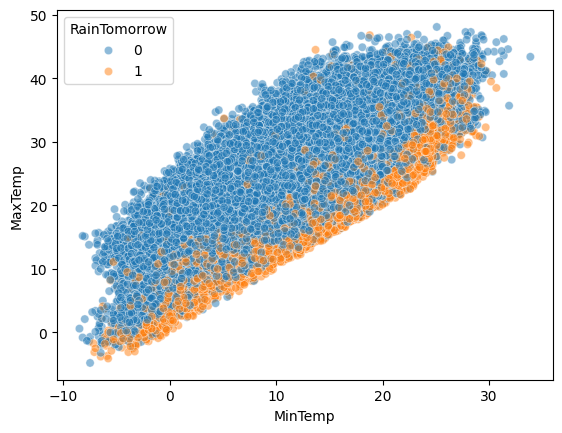

In [54]:
sns.scatterplot(x=X['MinTemp'], y=X['MaxTemp'], hue=y, alpha=0.5)
# Scatter Plot, или диаграмма рассеивания - показывает взаимосвязь между переменными
#  hue используется для добавления дополнительного измерения к графику путем изменения цвета точек в зависимости от значений указанной категории,
#  что позволяет визуализировать различия между группами на одном графике. Тут у нас это будет/не будет дождь на след день

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logreg = LogisticRegression()
logreg.fit(X[['MinTemp', 'MaxTemp']], y)

LogisticRegression()

<Axes: xlabel='MinTemp', ylabel='MaxTemp'>

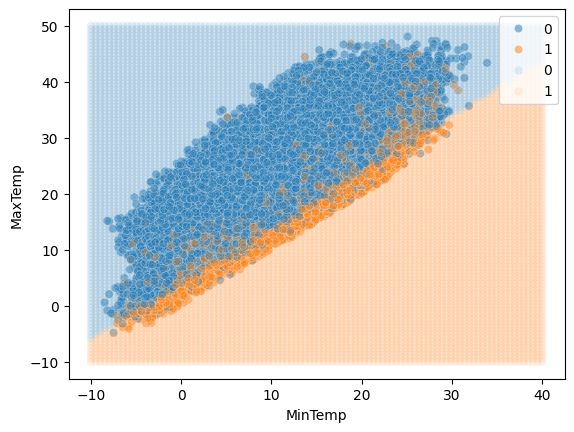

In [57]:
_x = np.linspace(-10, 40, 100)
_y = np.linspace(-10, 50, 100)
xv, yv = np.meshgrid(_x, _y) # np.meshgrid применяется для формирования двумерной сетки координат x и y на основе заданных числовых диапазонов
grid = np.vstack([xv.flatten(), yv.flatten()]).T # .flatten() преобразовывает массивы в одномерный вектор, np.vstack - построчное объединение массивов
_pred = logreg.predict(grid)

sns.scatterplot(x=X['MinTemp'], y=X['MaxTemp'], hue=y, alpha=0.5) # кружки (реальные данные)
sns.scatterplot(x=grid[:,0], y=grid[:,1], hue=_pred, alpha=0.1) # фон (наше предсказание)

Попробуем 2 других признаках

<Axes: xlabel='Humidity9am', ylabel='Pressure9am'>

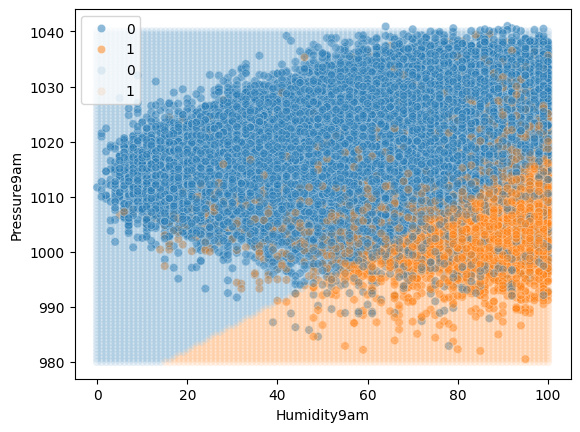

In [58]:
himidity_preasure_df = df[['Humidity9am', 'Pressure9am', 'RainTomorrow']].dropna().copy()
X = himidity_preasure_df[['Humidity9am', 'Pressure9am']] # Humidity - влажность
y = himidity_preasure_df['RainTomorrow']

logreg = LogisticRegression()
logreg.fit(X[['Humidity9am', 'Pressure9am']], y)

_x = np.linspace(0, 100, 100)
_y = np.linspace(980, 1040, 100)
xv, yv = np.meshgrid(_x, _y)
grid = np.vstack([xv.flatten(), yv.flatten()]).T
_pred = logreg.predict(grid)

sns.scatterplot(x=X['Humidity9am'], y=X['Pressure9am'], hue=y, alpha=0.5)
sns.scatterplot(x=grid[:,0], y=grid[:,1], hue=_pred, alpha=0.1)

<Axes: xlabel='Humidity9am', ylabel='Pressure9am'>

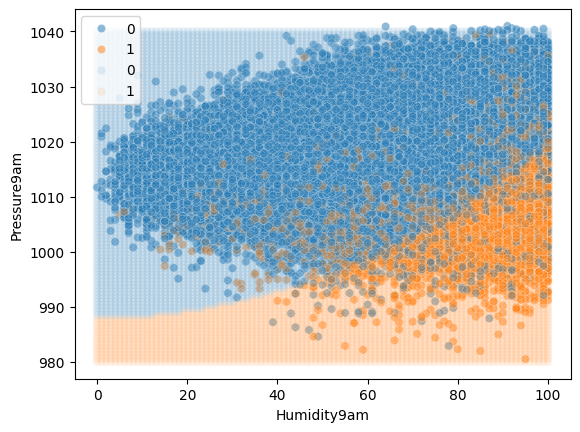

In [59]:
# Попробуем как-то преобразовать данные (возведем в квадрат)
def square_himidity(data):
    data = data.copy()
    data['Humidity9am_2'] = data['Humidity9am'] ** 2
    return data[['Humidity9am_2', 'Pressure9am']]

logreg = LogisticRegression()
logreg.fit(square_himidity(X), y)

_x = np.linspace(0, 100, 100)
_y = np.linspace(980, 1040, 100)
xv, yv = np.meshgrid(_x, _y)
grid = pd.DataFrame(np.vstack([xv.flatten(), yv.flatten()]).T, columns=['Humidity9am', 'Pressure9am'])

polinomial_grid = square_himidity(grid)
_pred = logreg.predict(polinomial_grid)

sns.scatterplot(x=X['Humidity9am'], y=X['Pressure9am'], hue=y, alpha=0.5)
sns.scatterplot(x=grid['Humidity9am'], y=grid['Pressure9am'], hue=_pred, alpha=0.1)

## Практика
Используем больше признаков

In [60]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# разбиваем столбцы на признаки и таргетную переменную
X = df.drop(columns='RainTomorrow')
y = df['RainTomorrow']

cat_features = list(df.select_dtypes(include=['object']).columns)
X[cat_features] = X[cat_features].astype(str)
X[cat_features].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
45587,Canberra,NW,SW,NW,No
45588,Canberra,ENE,E,W,Yes
45589,Canberra,NW,N,NNE,Yes
45590,Canberra,NW,WNW,W,Yes
45591,Canberra,SSE,SSE,ESE,Yes


Попробуем сразу обучить модель :)

In [61]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)
# делим наши данные на тренировочную и тестовую часть.
# Обучение будет происходить на тренировочной выборке, а на тестовой - проверка результата

Text(0.5, 1.0, 'Количество наблюдений во времени')

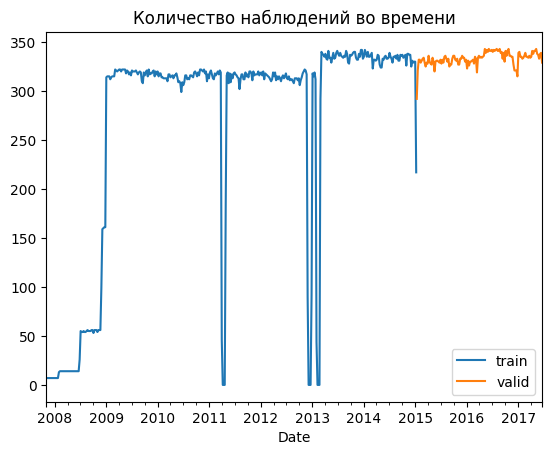

In [62]:
X_train.resample('7d', on='Date')['RainToday'].count().plot(label='train')
X_valid.resample('7d', on='Date')['RainToday'].count().plot(label='valid')
plt.legend()
plt.title('Количество наблюдений во времени')

In [63]:
X_train_num_features = X_train.drop(columns=cat_features + ['Date']).copy()
X_valid_num_features = X_valid.drop(columns=cat_features + ['Date']).copy()
# оставили только числовые признаки и дату

X_train_num_features = X_train_num_features.fillna(0)
X_valid_num_features = X_valid_num_features.fillna(0)
# заменили NaNы на 0

In [64]:
# Обучение
model = LogisticRegression()
model.fit(
    X_train_num_features,
    y_train,
)
# Оценка
y_pred_proba = model.predict_proba(X_valid_num_features)
roc_auc = roc_auc_score(y_valid, y_pred_proba[:, 1])

print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.7967421818592801


### **Стандартизация признаков**     
- приведение различных масштабов и единиц измерения к единому виду   
- удобнее сравнивать признаки между собой   
- позволяет устранить возможное влияние отклонений по какому-либо признаку
- многие модели машинного обучения ведут себя лучше при стандартизированных данных   

 Можно почитать здесь: https://habr.com/ru/articles/527334/

In [65]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

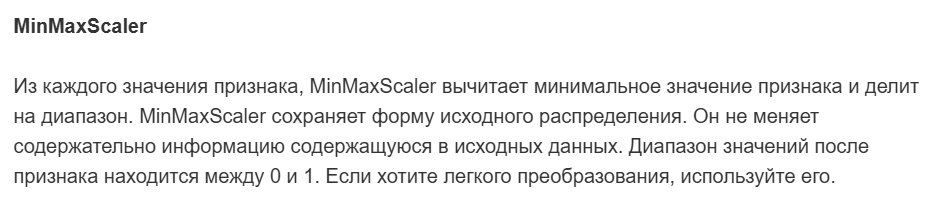
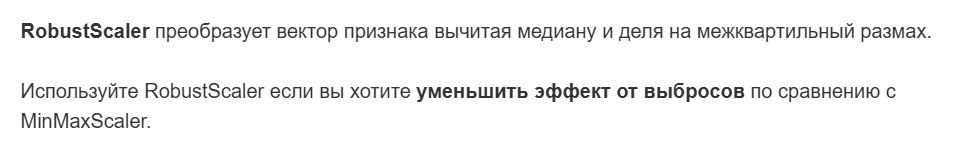
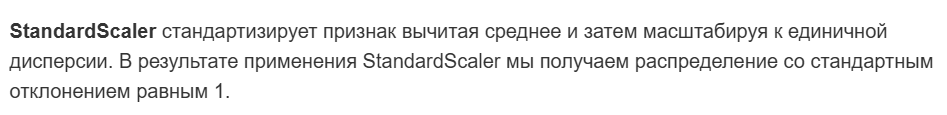

In [69]:
# MinMaxScaler() Для каждой фичи x делает: (x - min) / (max - min) -> [0, 1], используется редко, избавляет от масштаба
# StandardScaler() Для каждой фичи х делает: (x - mean) / std      -> mean = 0, std = 1, используется с нормальным распределением
# RobustScaler() Для каждой фичи х делает: (x - Q2) / Q3 - Q1      -> mean = 0, std = 1, Q1, Q2 и Q1 - 25%, 50% И 75% квантили

scaler = StandardScaler()
df_to_stand = df.select_dtypes(include=['float64', 'float32', 'float16']) # выбираем только числовые признаки
stand_features = scaler.fit_transform(df_to_stand)

In [71]:
stand_features = scaler.fit_transform(df_to_stand)
stand_features = pd.DataFrame(stand_features, columns=df_to_stand.columns)

In [72]:
stand_features.describe()
# .describe() выдает статистики

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,1.415560e+05,1.418710e+05,1.407870e+05,8.135000e+04,7.437700e+04,1.329230e+05,1.408450e+05,1.395630e+05,1.404190e+05,1.385830e+05,1.281790e+05,1.282120e+05,8.853600e+04,8.509900e+04,1.412890e+05,1.394670e+05
mean,1.638370e-16,2.628394e-16,-1.938023e-17,-1.376540e-16,-1.179636e-15,-1.881624e-16,1.614354e-17,-6.516732e-18,1.570674e-16,-7.219097e-17,2.838202e-16,-1.787252e-14,-1.714240e-16,-1.669920e-17,-3.363397e-16,-1.173819e-16
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000006e+00,1.000007e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00,1.000006e+00,1.000006e+00,1.000004e+00,1.000004e+00
min,-3.230604e+00,-3.937677e+00,-2.776060e-01,-1.305911e+00,-2.016357e+00,-2.500914e+00,-1.574441e+00,-2.117109e+00,-3.613616e+00,-2.475399e+00,-5.228911e+00,-5.422780e+00,-1.536956e+00,-1.655201e+00,-3.725273e+00,-3.904427e+00
25%,-7.162601e-01,-7.483968e-01,-2.776060e-01,-6.851658e-01,-7.205748e-01,-6.611566e-01,-7.873324e-01,-6.403925e-01,-6.216824e-01,-6.963562e-01,-6.690301e-01,-6.904143e-01,-1.190575e+00,-9.200734e-01,-7.219532e-01,-7.332878e-01
50%,-2.911013e-02,-8.806126e-02,-2.776060e-01,-1.599194e-01,2.314285e-01,-7.243431e-02,-1.126677e-01,4.116906e-02,6.068847e-02,2.487746e-02,-7.565802e-03,-8.271485e-03,1.949466e-01,1.826178e-01,-4.428103e-02,-8.464564e-02
75%,7.205080e-01,6.987216e-01,-1.831008e-01,4.608263e-01,7.867638e-01,5.898783e-01,5.619971e-01,6.091370e-01,7.430593e-01,6.980289e-01,6.679722e-01,6.738714e-01,8.877074e-01,9.177453e-01,7.103993e-01,6.793107e-01
max,3.391023e+00,3.494611e+00,4.354918e+01,3.331260e+01,1.818101e+00,6.992233e+00,1.304330e+01,7.765533e+00,1.635390e+00,2.332825e+00,3.285682e+00,3.459288e+00,1.580468e+00,1.652873e+00,3.575104e+00,3.605408e+00


**Попробуем разные варианты**

In [73]:
X_train_num_features.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
45587,8.0,24.3,0.0,3.4,6.3,30.0,6.0,20.0,68.0,29.0,1019.7,1015.0,7.0,7.0,14.4,23.6
45588,14.0,26.9,3.6,4.4,9.7,39.0,4.0,17.0,80.0,36.0,1012.4,1008.4,5.0,3.0,17.5,25.7
45589,13.7,23.4,3.6,5.8,3.3,85.0,6.0,6.0,82.0,69.0,1009.5,1007.2,8.0,7.0,15.4,20.2
45590,13.3,15.5,39.8,7.2,9.1,54.0,30.0,24.0,62.0,56.0,1005.5,1007.0,2.0,7.0,13.5,14.1
45591,7.6,16.1,2.8,5.6,10.6,50.0,20.0,28.0,68.0,49.0,1018.3,1018.5,7.0,7.0,11.1,15.4


In [74]:
results = []
for scaler_name, scaler in [
    ('StandardScaler', StandardScaler()),
    ('RobustScaler', RobustScaler()),
    ('MinMaxScaler', MinMaxScaler()),
]:
    X_train_num_features_stand = scaler.fit_transform(X_train_num_features)
    X_valid_num_features_stand = scaler.transform(X_valid_num_features)

    model = LogisticRegression(max_iter=200)
    model.fit(
        X_train_num_features_stand,
        y_train,
    )
    y_pred_proba = model.predict_proba(X_valid_num_features_stand)
    roc_auc = roc_auc_score(y_valid, y_pred_proba[:, 1])

    results.append({
        'scaler_name': scaler_name,
        'ROC AUC Score': roc_auc,
    })
pd.DataFrame(results)

,scaler_name,ROC AUC Score
0,StandardScaler,0.806425
1,RobustScaler,0.806504
2,MinMaxScaler,0.805606


## Обработка пропусков

Основные варианты:
1. Выкинуть эти данные (удалить строки, удалить признак целиком)
2. Заменять пропуски разными методами
3. Делать/не делать дополнительную фичу
4. Ничего не делать
5. Заполнять на основе скоррелированных признаков
6. Обучить модель на заполнение пропусков*



Простые варианты заполнения пропусков:

**для числовых признаков**
* среднее (плохо работает с выбросами)
* медиана (более утойчива к выбросам)
* заполнить нулями (может поехать признак)
* заполнить исходя из значений скоррелированных признаков

**для категориальных признаков**
* мода
* новая категория

In [75]:
df.isna().sum()

,0
Date,0
Location,0
MinTemp,637
MaxTemp,322
Rainfall,1406
Evaporation,60843
Sunshine,67816
WindGustDir,9330
WindGustSpeed,9270
WindDir9am,10013


In [76]:
df_to_test_filling = df.copy()

In [77]:
df_to_test_filling['Sunshine_nan'] = 0
df_to_test_filling.loc[df['Sunshine'].isna(), 'Sunshine_nan'] = 1
# делаем новый признак на основе 'Sunshine'- нан он или нет

In [78]:
df_to_test_filling['Sunshine_nan'].value_counts()

,count
Sunshine_nan,
0,74377
1,67816


In [79]:
median = df_to_test_filling['Evaporation'].median() #испарение
df_to_test_filling['Evaporation_filled'] = df_to_test_filling['Evaporation'].fillna(median)

In [81]:
median

4.8

In [80]:
df_to_test_filling[df_to_test_filling['Evaporation'].isna()][['Evaporation', 'Evaporation_filled']].head(1)

,Evaporation,Evaporation_filled
30180,NaN,4.8


Попробуем заполнить пропуски средним значением

In [82]:
X_train_num_features = X_train.drop(columns=cat_features + ['Date']).copy()
X_valid_num_features = X_valid.drop(columns=cat_features + ['Date']).copy()

train_mean = X_train_num_features.mean()
for col in X_train_num_features.columns:
    X_train_num_features[col] = X_train_num_features[col].fillna(train_mean[col])
    X_valid_num_features[col] = X_valid_num_features[col].fillna(train_mean[col])

scaler = StandardScaler()
X_train_num_features_stand = scaler.fit_transform(X_train_num_features)
X_valid_num_features_stand = scaler.transform(X_valid_num_features)

model = LogisticRegression()
model.fit(
    X_train_num_features_stand,
    y_train,
)
y_pred_proba = model.predict_proba(X_valid_num_features_stand)
roc_auc = roc_auc_score(y_valid, y_pred_proba[:, 1])

print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.853453244217848


## Обработка выбросов

**Выбросы** - это объекты в данных, которые не принадлежат определенной зависимости. Это ненормальное наблюдение, которое находятся далеко от других наблюдений.

Что можно делать с ними?
1. Выкинуть эти данные
2. Заменять выбросы разными методами (медианы, средние значения и т.д.)
3. Делать/не делать дополнительную фичу
4. Ничего не делать
   
! Методы похожи, но все же есть отличия:   
из выбросов мы иногда все-таки можем получить какую-то информацию и разумно ее использовать, а не просто заменять статистикой (например, кто-то перепутал единицы измерения и написал вместо см измерение в мм и пр)

**признак WindGustSpeed**

Найдем выбросы с помощью квантилей. Наблюдения, значения которых больше 97,5% квантиля и которые меньше 2,5% квантиля будем считать выбросами и заменять на медиану.   
Квантиль - это значение, которое разделяет набор данных на части с определенной вероятностью.   
Квантиль показывает, какая доля значений в выборке находится ниже этого значения. Например, медиана - это 0.5-квантиль, и она делит выборку так, что 50% значений меньше неё, а 50% - больше   
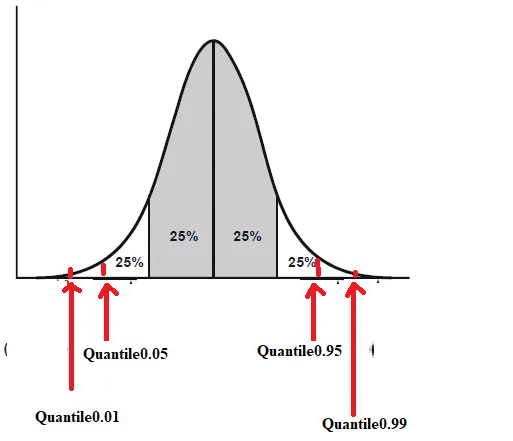


<Axes: >

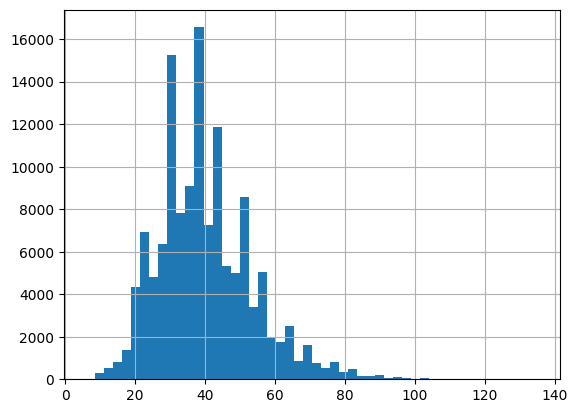

In [83]:
df_to_test_filling['WindGustSpeed'].hist(bins=50)

In [84]:
df_to_test_filling['WindGustSpeed'].describe()

,WindGustSpeed
count,132923.000000
mean,39.984292
std,13.588801
min,6.000000
25%,31.000000
50%,39.000000
75%,48.000000
max,135.000000


In [85]:
np.quantile(df_to_test_filling['WindGustSpeed'], q=0.975) # Вычисляет заданную квантиль

np.float64(nan)

In [86]:
wind_gust_speed_max_value = np.quantile(df_to_test_filling['WindGustSpeed'].fillna(df_to_test_filling['WindGustSpeed'].mean()), q=0.975)
#заполнили наны средним, теперь квантиль считается
wind_gust_speed_max_value

np.float64(72.0)

In [87]:
wind_gust_speed_min_value = np.quantile(df_to_test_filling['WindGustSpeed'].fillna(df_to_test_filling['WindGustSpeed'].mean()), q=0.025)
wind_gust_speed_min_value

np.float64(19.0)

In [88]:
condition = (df_to_test_filling['WindGustSpeed'] > wind_gust_speed_max_value) | (df_to_test_filling['WindGustSpeed'] < wind_gust_speed_min_value)
# условие для значений быть меньше нижней квантили и больше верхней

df_to_test_filling.loc[condition, 'WindGustSpeed'] = df_to_test_filling['WindGustSpeed'].median()
# заменили выбросы по условию выше на медиану
df_to_test_filling['WindGustSpeed'].describe()

,WindGustSpeed
count,132923.000000
mean,39.554878
std,11.333324
min,19.000000
25%,31.000000
50%,39.000000
75%,46.000000
max,72.000000


<Axes: >

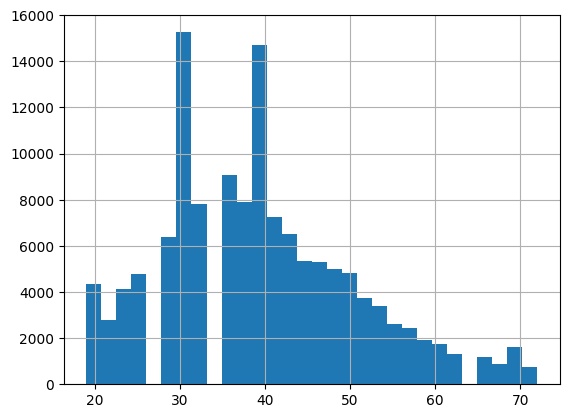

In [89]:
df_to_test_filling['WindGustSpeed'].hist(bins=30)

## Генерация новых признаков   
Важно опираться на свои/экспертные знания о данных чтобы генерировать новые признаки, например:   
- разница между мин и макс температурой - большой температурный перепад часто связан с более нестабильной атмосферой, что может способствовать выпадению осадков   
- месяц (например в Новосибирске максимум осадков приходится на июль-август, а минимум - на февраль-март)
- кол-во дождливых дней в месяце до сегодняшней даты
- ...

In [90]:
X_train['TempDiff'] = X_train['MaxTemp'] - X_train['MinTemp']
X_valid['TempDiff'] = X_valid['MaxTemp'] - X_valid['MinTemp']

X_train['month'] = X_train['Date'].dt.month
X_valid['month'] = X_valid['Date'].dt.month

In [91]:
X_train_num_features = X_train.drop(columns=cat_features + ['Date']).copy()
X_valid_num_features = X_valid.drop(columns=cat_features + ['Date']).copy()

train_mean = X_train_num_features.mean()
X_train_num_features = X_train_num_features.fillna(train_mean)
X_valid_num_features = X_valid_num_features.fillna(train_mean)

scaler = StandardScaler()
X_train_num_features_stand = scaler.fit_transform(X_train_num_features)
X_valid_num_features_stand = scaler.transform(X_valid_num_features)

model = LogisticRegression()
model.fit(
    X_train_num_features_stand,
    y_train,
)
y_pred_proba = model.predict_proba(X_valid_num_features_stand)
roc_auc = roc_auc_score(y_valid, y_pred_proba[:, 1])

print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.853491433923005


In [92]:
X_train['RainToday_category'] = X_train['RainToday'].replace({'Yes': 1, 'No': 0, 'nan': 0}).astype(int)
X_valid['RainToday_category'] = X_valid['RainToday'].replace({'Yes': 1, 'No': 0, 'nan': 0}).astype(int)

X_train['rain_count_from_month_start'] = X_train.groupby(['Location', 'month'])['RainToday_category'].cumsum()
X_valid['rain_count_from_month_start'] = X_valid.groupby(['Location', 'month'])['RainToday_category'].cumsum()
# .cumsum() - накопительная сумма, представляет собой последовательность, в которой каждый элемент в заданной позиции является суммой всех предыдущих элементов
# в исходной последовательности до элемента в этой позиции включительно (в данном случае - в каком кол-ве дней с начала месяца был дождь)

In [93]:
X_train_num_features = X_train.drop(columns=cat_features + ['Date']).copy()
X_valid_num_features = X_valid.drop(columns=cat_features + ['Date']).copy()

train_mean = X_train_num_features.mean()
X_train_num_features = X_train_num_features.fillna(train_mean)
X_valid_num_features = X_valid_num_features.fillna(train_mean)

scaler = StandardScaler()
X_train_num_features_stand = scaler.fit_transform(X_train_num_features)
X_valid_num_features_stand = scaler.transform(X_valid_num_features)

model = LogisticRegression()
model.fit(
    X_train_num_features_stand,
    y_train,
)
y_pred_proba = model.predict_proba(X_valid_num_features_stand)
roc_auc = roc_auc_score(y_valid, y_pred_proba[:, 1])

print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.8551434835279196


**Feature discretization/binarization** <a class='acnhor' id='feature_discretization'>

**Категория давления (0-100)**

1 категория - низкое давление (до 1000),<br>2 среднее - от 1000 до 1030<br>...

**Бинаризация**

1 - до 1000

0 - более 1000

<Axes: >

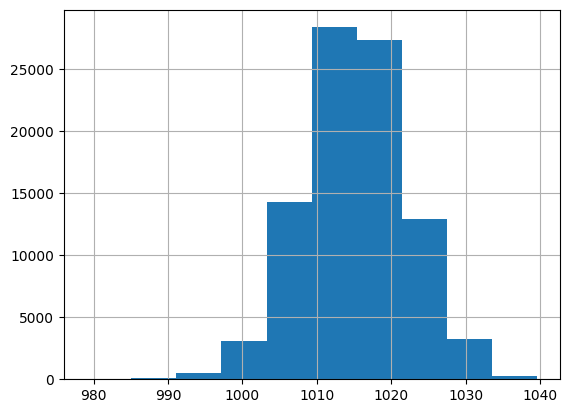

In [94]:
X_train['Pressure3pm'].hist()

In [95]:
def age_to_cat(X): # категоризуем

    X['Pressure3pm_cat'] = 0

    X.loc[X['Pressure3pm'] <= 1000, 'Pressure3pm_cat'] = 1
    X.loc[(X['Pressure3pm'] > 1000) & (X['Pressure3pm'] <= 1030), 'Pressure3pm_cat'] = 2
    X.loc[(X['Pressure3pm'] > 1030), 'Pressure3pm_cat'] = 3

    return X

def age_to_binary_cat(X): # биномизируем

    X['Pressure3pm_binary_cat'] = 0
    X.loc[X['Pressure3pm'] <= 1000, 'Pressure3pm_binary_cat'] = 1

    return X

In [96]:
X_train = age_to_cat(X_train)
X_train = age_to_binary_cat(X_train)

X_valid = age_to_cat(X_valid)
X_valid = age_to_binary_cat(X_valid)

In [97]:
X_train_num_features = X_train.drop(columns=cat_features + ['Date']).copy()
X_valid_num_features = X_valid.drop(columns=cat_features + ['Date']).copy()

train_mean = X_train_num_features.mean()
X_train_num_features = X_train_num_features.fillna(train_mean)
X_valid_num_features = X_valid_num_features.fillna(train_mean)

scaler = StandardScaler()
X_train_num_features_stand = scaler.fit_transform(X_train_num_features)
X_valid_num_features_stand = scaler.transform(X_valid_num_features)

model = LogisticRegression()
model.fit(
    X_train_num_features_stand,
    y_train,
)
y_pred_proba = model.predict_proba(X_valid_num_features_stand)
roc_auc = roc_auc_score(y_valid, y_pred_proba[:, 1])

print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.8550701471601652


## **Работа с категориями**

Если у признака только 2 значения, можно их закодировать числами 0 и 1.

In [98]:
X_train[cat_features].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
45587,Canberra,NW,SW,NW,No
45588,Canberra,ENE,E,W,Yes
45589,Canberra,NW,N,NNE,Yes
45590,Canberra,NW,WNW,W,Yes
45591,Canberra,SSE,SSE,ESE,Yes


Заменять строковые значения порядковыми числами не всегда хорошая идея

1 < 2 < 3 < 4

Хотя иногда это может иметь смысл, в случае тех категорий которые мы можем однозначно отсортировать

например "ступень образования":

школа < колледж < вуз < аспирантура


В большинстве случаев

Если у признака только 2 значения, можно их закодировать числами 0 и 1.  
Если больше 2 значений, то лучше использовать one-hot encoding.   
Почитать подробнее: https://habr.com/ru/articles/666234/

**A) Бинарные переменные**<a class='anchor' id='dummy'>

In [99]:
X_train['Location'].nunique()

49

In [100]:
X_train['Location'].value_counts().tail()
# .tail() отображает последние части объекта, обычно последние несколько строк набора данных.

,count
Location,
PearceRAAF,1879
Williamtown,1764
Katherine,677
Nhil,676
Uluru,638


In [ ]:
pd.get_dummies(df['Location'], dtype=int)
# .get_dummies кодирует категориальные переменные
# этот метод может очень сильно увеличивать пр-во признаков, что не есть хорошо

,Adelaide,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,...,Richmond,Sale,SalmonGums,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
45587,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45588,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45589,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45590,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
45591,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39537,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
33519,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
30175,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27166,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [101]:
X_train = pd.concat([X_train, pd.get_dummies(X_train['Location'], dtype=int)], axis=1)
X_valid = pd.concat([X_valid, pd.get_dummies(X_valid['Location'], dtype=int)], axis=1)
# pd.concat - склеивает столбцы ДСетов

In [102]:
X_train_num_features = X_train.drop(columns=cat_features + ['Date']).copy()
X_valid_num_features = X_valid.drop(columns=cat_features + ['Date']).copy()

train_mean = X_train_num_features.mean()
X_train_num_features = X_train_num_features.fillna(train_mean)
X_valid_num_features = X_valid_num_features.fillna(train_mean)

scaler = StandardScaler()
X_train_num_features_stand = scaler.fit_transform(X_train_num_features)
X_valid_num_features_stand = scaler.transform(X_valid_num_features)

model = LogisticRegression()
model.fit(
    X_train_num_features_stand,
    y_train,
)
y_pred_proba = model.predict_proba(X_valid_num_features_stand)
roc_auc = roc_auc_score(y_valid, y_pred_proba[:, 1])

print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.8593190360464996


## Визуализация данных   
Для начала построим *гистограмму* (столбчатая диаграмма, где высота каждого столбца показывает, сколько раз встречается соответствующее значение или диапазон значений)   
и *плотность* ("сглаженная версия" гистограммы, показывает общую форму распределения данных)

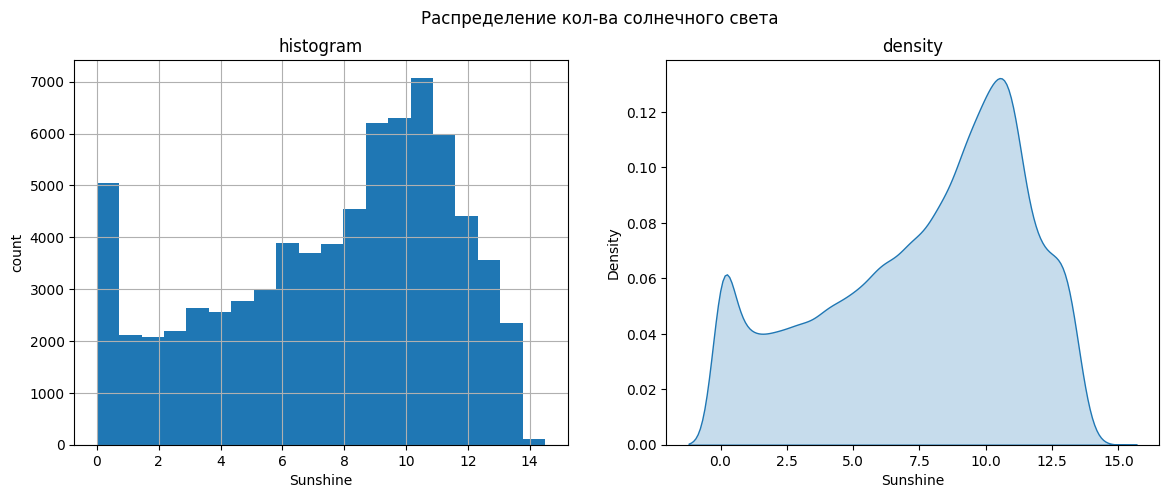

In [103]:
plt.figure(figsize=(14, 5))
feature = 'Sunshine'

plt.subplot(121)
df[feature].hist(density=False, bins=20)
plt.ylabel('count')
plt.xlabel(feature)
plt.title('histogram')

plt.subplot(122)
sns.kdeplot(df[feature], fill=True, legend=False)
plt.xlabel(feature)
plt.title('density')
#поменятьт название
plt.suptitle('Распределение кол-ва солнечного света')
plt.show()

Можно отбразить на графике так же
- Среднее арифметическое (мат ожидание) = SUM / N
- Медиана (quantile 50%)  = Середина отранжированного ряда
- Мода (подходит и для категориальных переменных!) = наиболее часто встречающееся значение в выборке

In [105]:
target_mean = round(df[feature].mean(), 2) # round округляет число до n знаков после запятой
target_median = df[feature].median()
target_mode = df[feature].mode()[0]

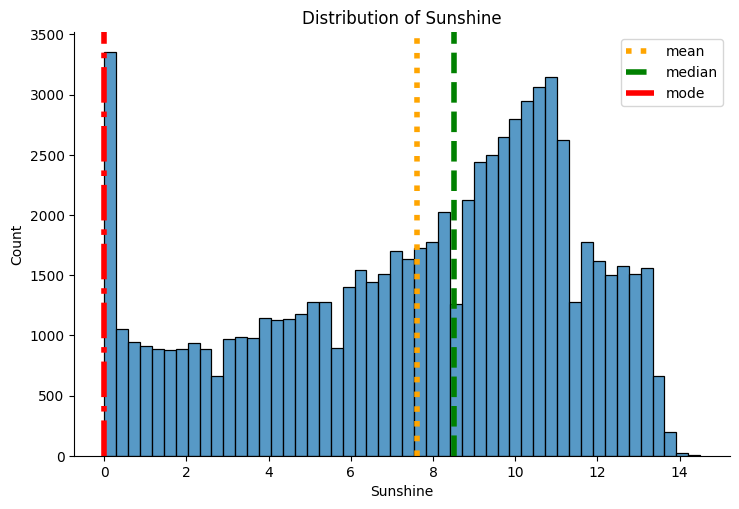

In [106]:
graph = sns.displot(df[feature], bins=50, height=5, aspect=1.5)

plt.axvline(target_mean, label='mean', linestyle=':', linewidth=4, color='orange')
plt.axvline(target_median, label='median', linestyle='--', linewidth=4, color='g')
plt.axvline(target_mode, label='mode', linestyle='-.', linewidth=4, color='r')

plt.title(f'Distribution of {feature}')
plt.legend()
plt.show()

Если не учитывать 0:

In [107]:
target_mean_adjusted = df[df[feature] > 0][feature].mean()
target_median_adjusted = df[df[feature] > 0][feature].median()
target_mode_adjusted = df[df[feature] > 0][feature].mode()[0]

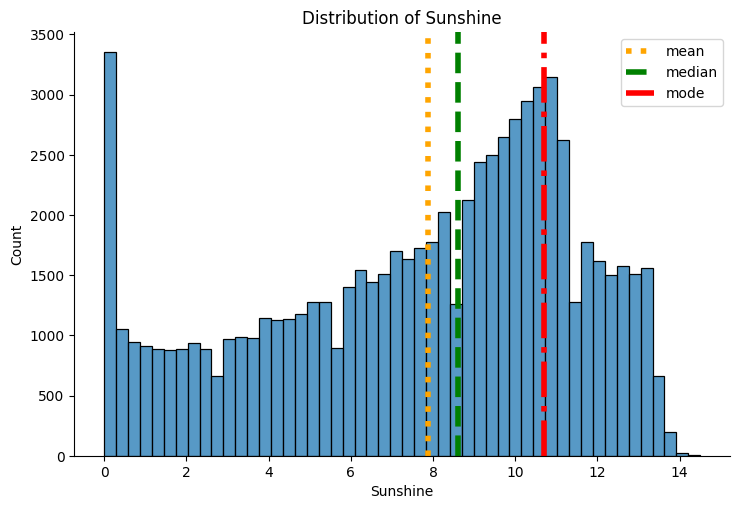

In [108]:
graph = sns.displot(df[df[feature] < 500_000][feature], bins=50, height=5, aspect=1.5)

plt.axvline(target_mean_adjusted, label='mean', linestyle=':', linewidth=4, color='orange')
plt.axvline(target_median_adjusted, label='median', linestyle='--', linewidth=4, color='g')
plt.axvline(target_mode_adjusted, label='mode', linestyle='-.', linewidth=4, color='r')

plt.title(f'Distribution of {feature}')
plt.legend()
plt.show()

### Анализ признаков

#### Количественные признаки   
Можем вывести гистограммы сразу всех признаков

In [109]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16'])

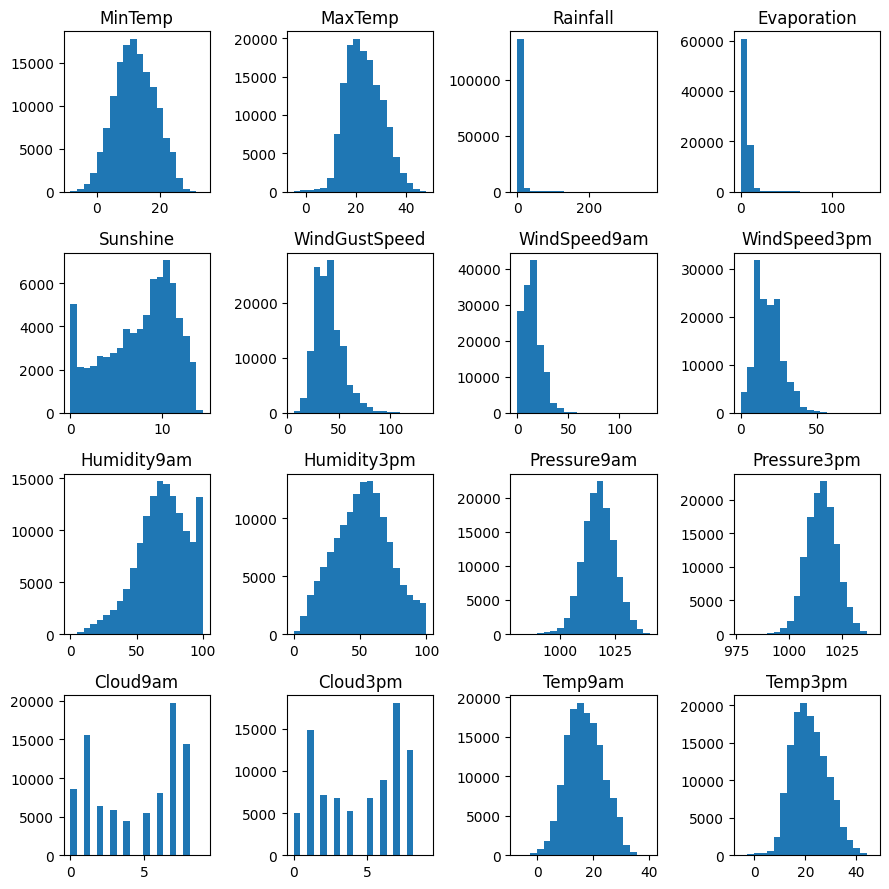

In [110]:
df_num_features.hist(figsize=(9,9), bins=20, grid=False)
plt.tight_layout()
# .tight_layout() автоматически настраивает параметры подграфиков для обеспечения плотной компоновки, сводя к минимуму перекрывающиеся элементы

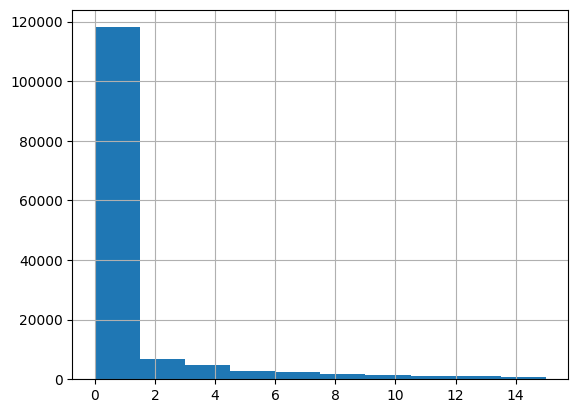

In [111]:
df.loc[df['Rainfall'] > 15, 'Rainfall'] = df['Rainfall'].median()
df['Rainfall'].hist();

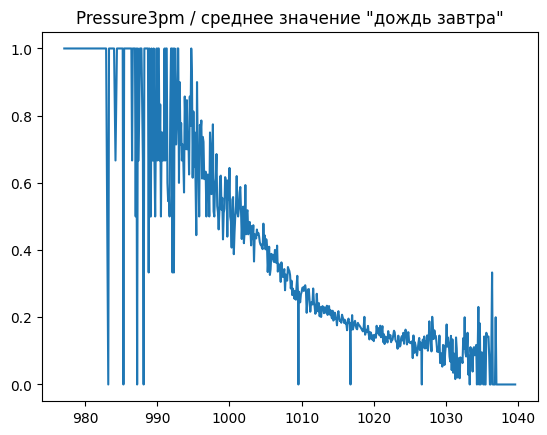

In [112]:
plt.plot(df.groupby('Pressure3pm')['RainTomorrow'].mean())
plt.title('Pressure3pm / среднее значение "дождь завтра"')
plt.show()

In [113]:
df['Pressure3pm_cat'] = pd.qcut(df['Pressure3pm'], 5)
#  pd.qcut делит данные на группы одинакового размера (своего рода автоматическая категоризация)

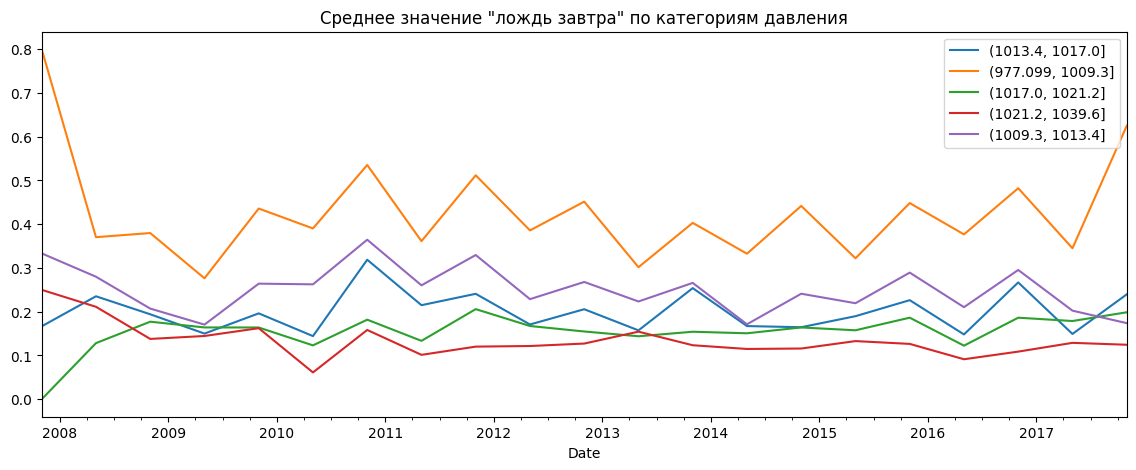

In [114]:
plt.figure(figsize=(14, 5))
for cat in df['Pressure3pm_cat'].unique():
    observations = df[df['Pressure3pm_cat'] == cat].copy()
    if observations.shape[0] > 0:
        df[df['Pressure3pm_cat'] == cat].resample('6m', on='Date')['RainTomorrow'].mean().plot(label=cat)
plt.title('Среднее значение "лождь завтра" по категориям давления')
plt.legend(loc='upper right')

In [115]:
df = df.drop(columns='Pressure3pm_cat')

In [116]:
df_num_features['target'] = df['RainTomorrow']

### Можно построить гистограммы уже с разделением значений по таргету

In [117]:
import math

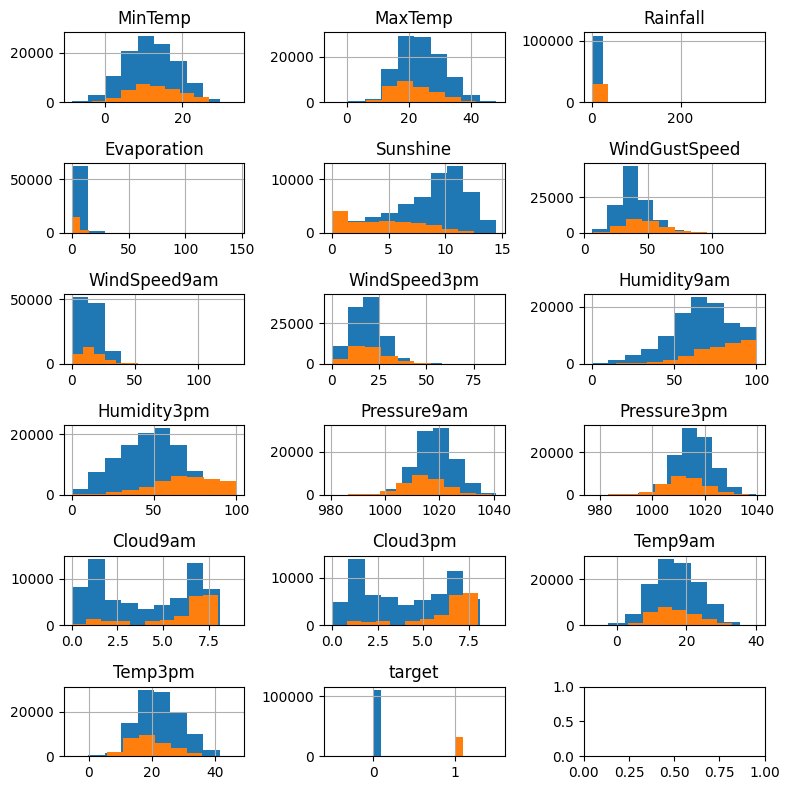

In [118]:
n_cols = 3
n_rows = math.ceil(len(df_num_features.columns) / n_cols) # math.ceil округляет число в большую сторону

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(8, 8))
axes = axes.flatten()

for i, column in enumerate(df_num_features.columns):
    df_num_features[df_num_features['target'] == 0][column].hist(ax=axes[i])
    df_num_features[df_num_features['target'] == 1][column].hist(ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

Можно посомтреть частоту дождливых дней завтра и для категориальных признаков

<BarContainer object of 16 artists>

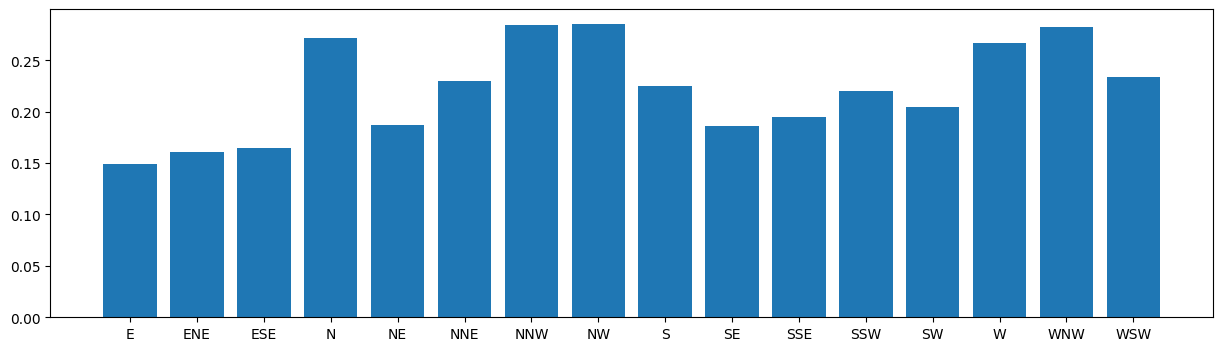

In [119]:
wind_dir_to_target = df.groupby('WindGustDir')['RainTomorrow'].mean()

plt.figure(figsize=(15,4))
plt.bar(wind_dir_to_target.index, wind_dir_to_target.values)

**Связанные (скоррелированные) признаки**   
- *Корреляция* — это взаимосвязь между переменными, она показывает, как изменения в одной переменной связаны с изменениями в другой. Например, когда один показатель увеличивается, другой уменьшается — или тоже увеличивается   
- Корреляцию используют, чтобы оценить зависимость переменных друг от друга.   
Показывает __линейную__ связь между переменными!
- Изменяется от -1 до 1, чем ближе к 0 по модулю - тем меньше линейная связь   
- Можно посмотреть на диаграмме рассеивания:   

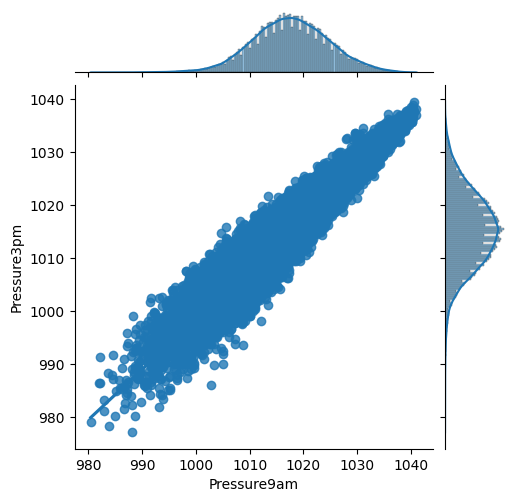

KeyError: 'Pressure3am'

In [120]:
grid = sns.jointplot(data=df, x='Pressure9am', y='Pressure3pm', kind='reg')
# sns.jointplot - диаграмма рассеивания, визуализация взаимосвязи между двумя переменными, а также их индивидуальных распределений.
grid.fig.set_figwidth(5)
grid.fig.set_figheight(5)
plt.show()
#df['Pressure9am'].corr(df['Pressure3am'])

### Матрица корреляций
*Матрица корреляций* - это таблица, которая отображает коэффициенты корреляции между всеми парами переменных в наборе данных   
Сильно скоррелированные признаки могут плохо влиять на качество некоторых моделей, поэтому можно от них избавиться, например просто удалить    
Подробнее: https://habr.com/ru/companies/abdigital/articles/592493/

In [121]:
df_num_features = df.select_dtypes(include=['float64', 'float32', 'float16', 'int'])

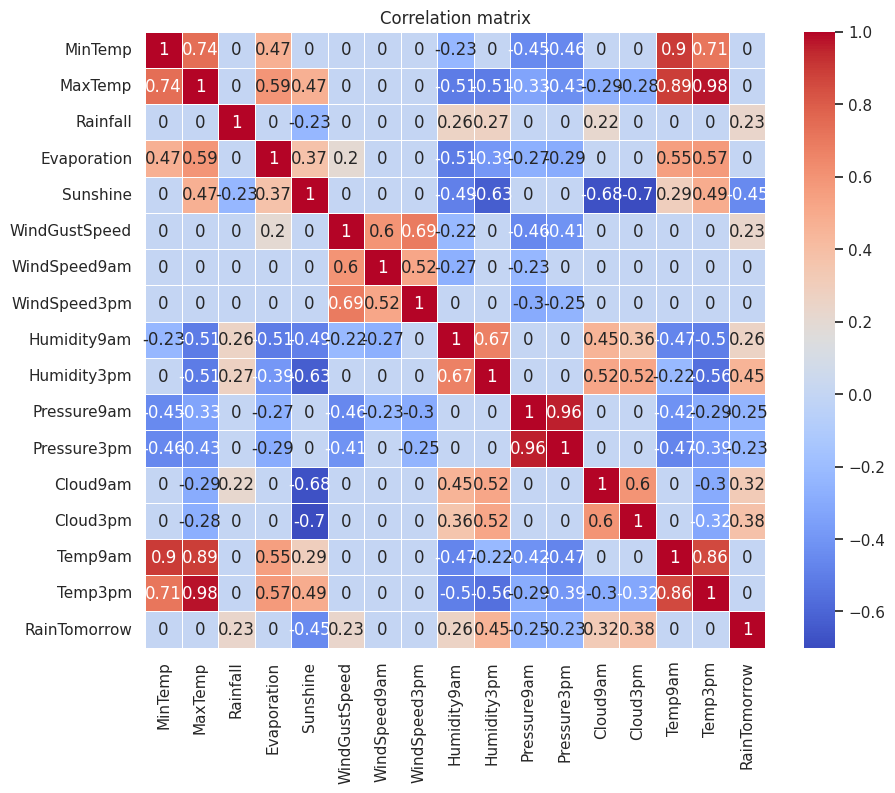

In [122]:
plt.figure(figsize = (10,8))

sns.set(font_scale=1)

corr_matrix = df_num_features.corr()
corr_matrix = np.round(corr_matrix, 2)
corr_matrix[np.abs(corr_matrix) < 0.2] = 0

sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()
# топ-3 самых скоррелированных пар признаков: Temp3pm/MaxTemp (0.98), Pressure3pm/Pressure9am (0.96), Temp9am/MinTemp (0.9)

### Box plot   
boxplot, он же “ящик с усами” – эффективный инструмент для выявления ключевых характеристик распределения, позволяющий быстро оценить медиану, разброс данных и обнаружить выбросы   

**Как строится box plot**  

- box - от 25% до 75% квантиля
- линия в середине box - медиана
- "усы":

**Как строятся "усы"** - вариантов масса
- среднее  +/-  3 сигма (стандартное отклонение)
- min / max
- median  +/-  1.5*(q75 - q25),
- ...

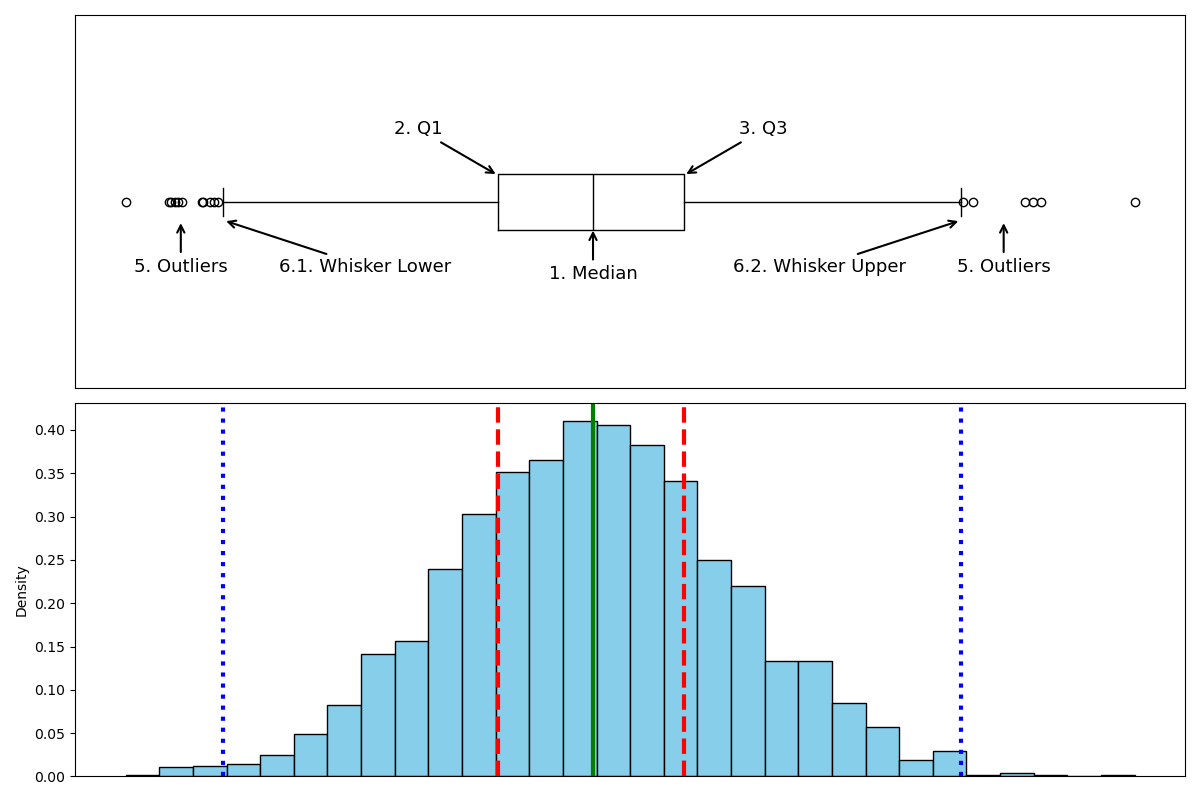   

Почитать подробнее: https://habr.com/ru/articles/879840/

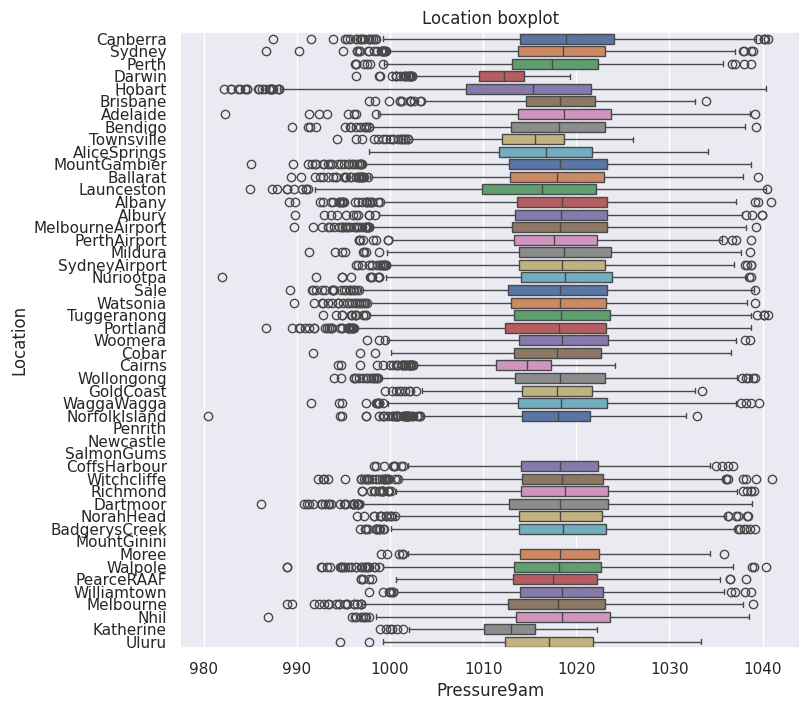

In [123]:
plt.figure(figsize=(8,8))
sns.boxplot(
    data=df,
    x='Pressure9am',
    y="Location",
    palette=sns.color_palette(),
    order=df['Location'].value_counts().index, #порядок, в котором они будут идти на графике
)
plt.title('Location boxplot')
plt.show()

Вернемся к модели

In [124]:
## Последний результат

X_train_num_features = X_train.drop(columns=cat_features + ['Date']).copy()
X_valid_num_features = X_valid.drop(columns=cat_features + ['Date']).copy()

train_mean = X_train_num_features.mean()
X_train_num_features = X_train_num_features.fillna(train_mean)
X_valid_num_features = X_valid_num_features.fillna(train_mean)

scaler = StandardScaler()
X_train_num_features_stand = scaler.fit_transform(X_train_num_features)
X_valid_num_features_stand = scaler.transform(X_valid_num_features)

model = LogisticRegression()
model.fit(
    X_train_num_features_stand,
    y_train,
)
y_pred_proba = model.predict_proba(X_valid_num_features_stand)
roc_auc = roc_auc_score(y_valid, y_pred_proba[:, 1])

print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.8593190360464996


In [125]:
## добавим нелинейность и удалим три наиболее скоррелированных признака из пар выше: (Temp3pm, Pressure3pm, Temp9am)

X_train_num_features = X_train.drop(columns=cat_features + ['Date']).copy()
X_valid_num_features = X_valid.drop(columns=cat_features + ['Date']).copy()

X_train_num_features['Pressure3pm_to9'] = X_train_num_features['Pressure3pm'] / X_train_num_features['Pressure9am']
X_valid_num_features['Pressure3pm_to9'] = X_valid_num_features['Pressure3pm'] / X_valid_num_features['Pressure9am']

X_train_num_features = X_train_num_features.drop(columns=['Pressure3pm', 'Temp3pm', 'Temp9am'])
X_valid_num_features = X_valid_num_features.drop(columns=['Pressure3pm', 'Temp3pm', 'Temp9am'])

train_mean = X_train_num_features.mean()
X_train_num_features = X_train_num_features.fillna(train_mean)
X_valid_num_features = X_valid_num_features.fillna(train_mean)

scaler = StandardScaler()
X_train_num_features_stand = scaler.fit_transform(X_train_num_features)
X_valid_num_features_stand = scaler.transform(X_valid_num_features)

model = LogisticRegression()
model.fit(
    X_train_num_features_stand,
    y_train,
)
y_pred_proba = model.predict_proba(X_valid_num_features_stand)
roc_auc = roc_auc_score(y_valid, y_pred_proba[:, 1])

print(f'ROC AUC Score: {roc_auc}')

ROC AUC Score: 0.8599150317377684


Начальный скор был 0.796! Подняли на 0.6!

И еще на последок несколько интересных статей про работу с признаками:
- https://habr.com/ru/companies/jetinfosystems/articles/470622/
- https://habr.com/ru/articles/264915/
- https://habr.com/ru/articles/550978/
- https://proglib.io/p/postroenie-i-otbor-priznakov-chast-2-feature-selection-2021-09-25